In [9]:
from env import LyingOracleEnv
from agent import LyingOracleAgent
import matplotlib.pyplot as plt
import numpy as np

In [10]:
MAX_STEPS = 500
LOWEST_NUMBER = 1
MAX_NUMBER = 1000

In [11]:
env = LyingOracleEnv(lowest_number=LOWEST_NUMBER, max_number=MAX_NUMBER)
agent = LyingOracleAgent(lowest_number=LOWEST_NUMBER, max_number=MAX_NUMBER)

rewards = []
oracle_beliefs = []
steps_list = []

print("Starting simulation...")
for i in range(1, MAX_STEPS + 1):
    oracle_truthful, next_action = agent.act()
    
    obs, reward, done, oracle_state = env.step(next_action)
    
    agent.observe(next_action, obs["oracle_answer"], obs["t"])
    
    rewards.append(reward)
    oracle_beliefs.append(1 if agent.oracle_truthful else 0)
    steps_list.append(i)
    
    if i <= 10 or i % 50 == 0 or done:
        print(f"[Step {i}] Guess: {next_action}, Agent believes: {'Truth' if oracle_truthful else 'Lie'} | Oracle: {oracle_state}, Reward: {reward}")
    
    if done:
        print(f"\n✓ Game over at step {i}! Hidden number was: {env.hidden}")
        break

print(f"\nSimulation complete. Total steps: {len(steps_list)}, Total reward: {sum(rewards):.2f}")

[DEBUG] Hidden number is 548
Starting simulation...
[Step 1] Guess: 500, Agent believes: Truth | Oracle: Truth, Reward: -0.01
[Step 2] Guess: 750, Agent believes: Truth | Oracle: Truth, Reward: -0.01
[Step 3] Guess: 625, Agent believes: Truth | Oracle: Lying, Reward: -0.01
[Step 4] Guess: 687, Agent believes: Truth | Oracle: Lying, Reward: -0.01
[Step 5] Guess: 718, Agent believes: Truth | Oracle: Lying, Reward: -0.01
[Step 6] Guess: 734, Agent believes: Truth | Oracle: Lying, Reward: -0.01
[Step 7] Guess: 742, Agent believes: Truth | Oracle: Lying, Reward: -0.01
[Step 8] Guess: 746, Agent believes: Truth | Oracle: Lying, Reward: -0.01
[Step 9] Guess: 748, Agent believes: Truth | Oracle: Lying, Reward: -0.01
[Agent] Detected contradiction at t=10. Switching belief to: Lie
[Step 10] Guess: 749, Agent believes: Truth | Oracle: Lying, Reward: -0.01
[Step 19] Guess: 548, Agent believes: Lie | Oracle: Lying, Reward: 1.0

✓ Game over at step 19! Hidden number was: 548

Simulation complete. T

Not enough data points for rolling mean (need 20, have 19)


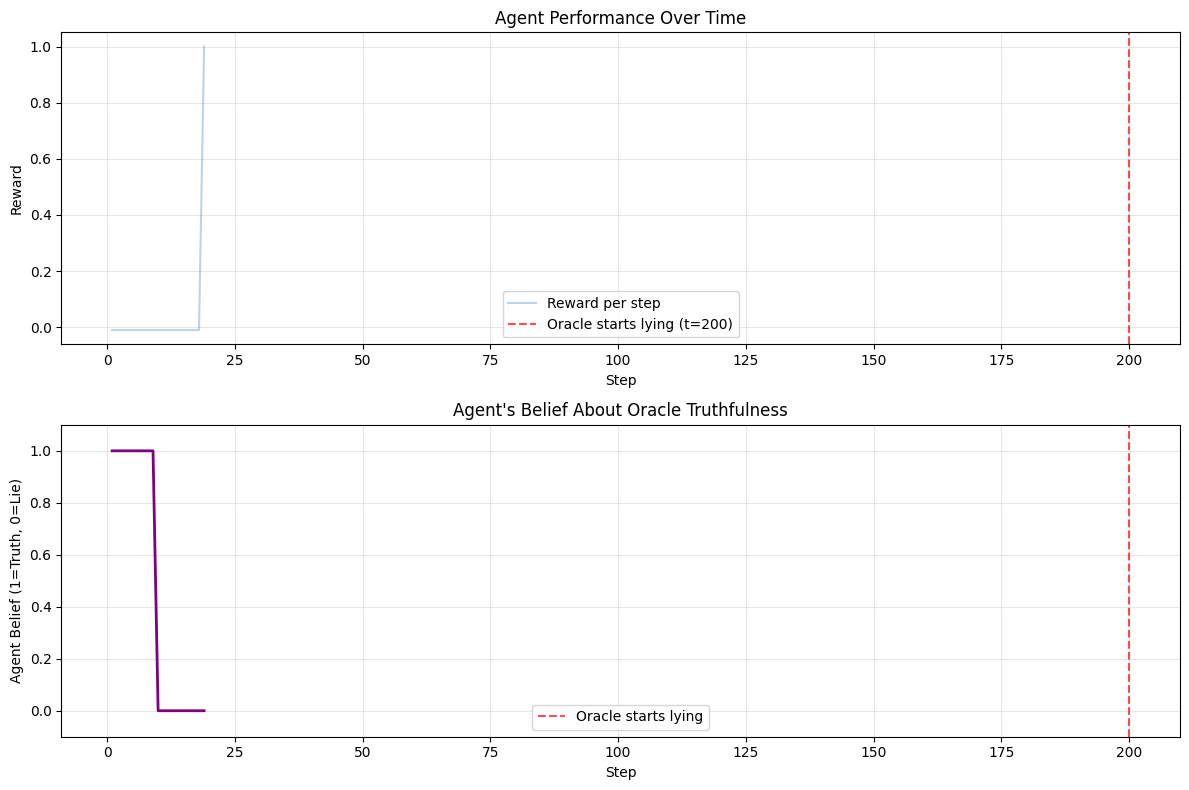

In [12]:
# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot rewards with rolling mean
ax1.plot(steps_list, rewards, alpha=0.3, label='Reward per step')
window = 20
if len(rewards) >= window:
    rolling_mean = np.convolve(rewards, np.ones(window)/window, mode='valid')
    ax1.plot(steps_list[window-1:], rolling_mean, linewidth=2, label=f'Rolling mean (window={window})')
else:
    print(f"Not enough data points for rolling mean (need {window}, have {len(rewards)})")
    
ax1.axvline(x=200, color='red', linestyle='--', label='Oracle starts lying (t=200)', alpha=0.7)
ax1.set_xlabel('Step')
ax1.set_ylabel('Reward')
ax1.set_title('Agent Performance Over Time')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot agent's belief about oracle
ax2.plot(steps_list, oracle_beliefs, linewidth=2, color='purple')
ax2.axvline(x=200, color='red', linestyle='--', label='Oracle starts lying', alpha=0.7)
ax2.set_xlabel('Step')
ax2.set_ylabel('Agent Belief (1=Truth, 0=Lie)')
ax2.set_title('Agent\'s Belief About Oracle Truthfulness')
ax2.set_ylim([-0.1, 1.1])
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()  
plt.show()
